##  Temperature Forecast Project

###  Data Set Information:

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.


**Attribute Information:**

1. station - used weather station number: 1 to 25

2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')

3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6

4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9

5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5

6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100

7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5

8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6

9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9

10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4

11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97

12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97

13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98

14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97

15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7

16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6

17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8

18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7

19. lat - Latitude (Â°): 37.456 to 37.645

20. lon - Longitude (Â°): 126.826 to 127.135

21. DEM - Elevation (m): 12.4 to 212.3

22. Slope - Slope (Â°): 0.1 to 5.2

23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9

24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9

25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

Please note that there are two target variables here: 

1) Next_Tmax: Next day maximum temperature

2) Next_Tmin: Next day  minimum temperature

In [1]:
#Loading the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Loading the dataset 
df=pd.read_csv("Temperature.csv",parse_dates=['Date'])

In [3]:
#Lets see first 5 rows of the dataset
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [4]:
#Lets see the shape of the data
print('The dataset have Rows: {} Columns: {}'.format(df.shape[0], df.shape[1]))

The dataset have Rows: 7752 Columns: 25


In [5]:
#lets check the null values in the dataset
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

Here we can see in the entire dataset there are many null values are present.

In [6]:
#Lets check the datatypes of columns
df.dtypes

station                    float64
Date                datetime64[ns]
Present_Tmax               float64
Present_Tmin               float64
LDAPS_RHmin                float64
LDAPS_RHmax                float64
LDAPS_Tmax_lapse           float64
LDAPS_Tmin_lapse           float64
LDAPS_WS                   float64
LDAPS_LH                   float64
LDAPS_CC1                  float64
LDAPS_CC2                  float64
LDAPS_CC3                  float64
LDAPS_CC4                  float64
LDAPS_PPT1                 float64
LDAPS_PPT2                 float64
LDAPS_PPT3                 float64
LDAPS_PPT4                 float64
lat                        float64
lon                        float64
DEM                        float64
Slope                      float64
Solar radiation            float64
Next_Tmax                  float64
Next_Tmin                  float64
dtype: object

Now , we extract day and month from Date and stored in 2 columns

In [7]:
df['Day']=df['Date'].dt.day
df['Month']=df['Date'].dt.month

In [8]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Day,Month
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,30.0,6.0
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,30.0,6.0
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,30.0,6.0
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,30.0,6.0
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,30.0,6.0


In [9]:
#Now dropping the 'Date' and station column a now there is no use of it.
df.drop(['Date','station'],axis=1,inplace=True)

In [10]:
df.describe()

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,...,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Day,Month
count,7682.000000,7682.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,...,7677.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7725.000000,7725.000000,7750.000000,7750.000000
mean,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,0.356080,...,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220,16.370968,7.080645
std,2.969999,2.413961,14.668111,7.192004,2.947191,2.345347,2.183836,33.730589,0.262458,0.258061,...,1.206214,0.050352,0.079435,54.279780,1.370444,429.158867,3.128010,2.487613,8.241331,2.238364
min,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,...,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000,7.000000,1.000000
25%,27.800000,21.700000,45.963543,84.222862,27.673499,22.089739,5.678705,37.266753,0.146654,0.140615,...,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000,8.000000,7.000000
50%,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,0.312421,...,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000,16.000000,7.000000
75%,32.000000,24.900000,67.190056,93.743629,31.710450,25.152909,8.032276,84.223616,0.575489,0.558694,...,0.000041,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000,24.000000,8.000000
max,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,0.968353,...,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000,31.000000,12.000000


From here we can check the statistical summary of dataset :
- We can check min and max values of each features.
- Checking the difference between mean and median of the columns.
- checking the difference between 75% values and max value of each columns and here we can see that there is some difference , i.e. some outliers are present 
- also in some columns data is skewed.

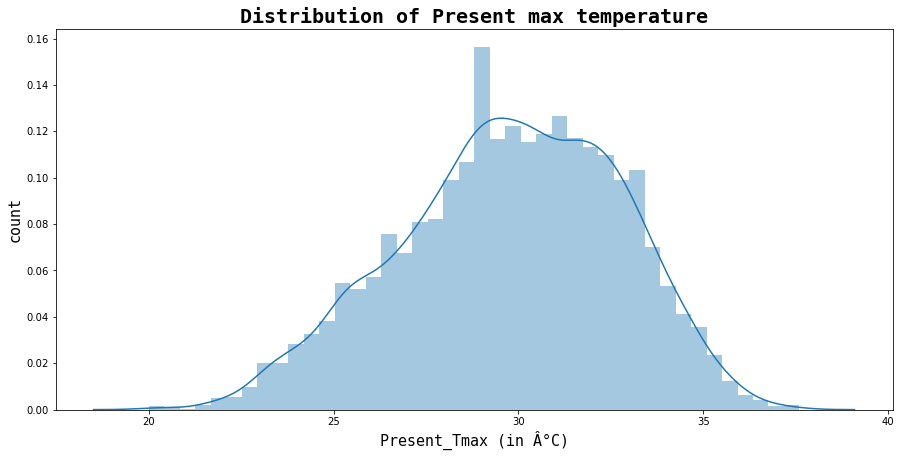

In [11]:
# Creating a Distribution plot for 'Present_Tmax'
present_Tmax = df['Present_Tmax'].value_counts()

plt.figure(figsize=(15, 7))
sns.distplot(df['Present_Tmax'])
plt.title('Distribution of Present max temperature', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Present_Tmax (in Â°C)', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('count', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.show()

Here we can  see that Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6 nad maximum in between 27 to 33(Â°C)

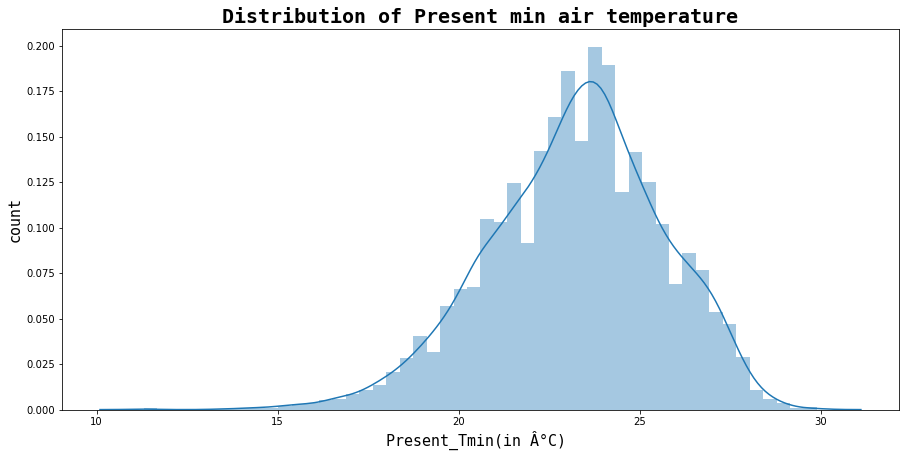

In [12]:
# Creating a Distribution plot for 'Present_Tmin'
present_Tmin = df['Present_Tmin'].value_counts()

plt.figure(figsize=(15, 7))
sns.distplot(df['Present_Tmin'])
plt.title('Distribution of Present min air temperature', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Present_Tmin(in Â°C) ', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('count', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.show()

Here we can see that the minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9.

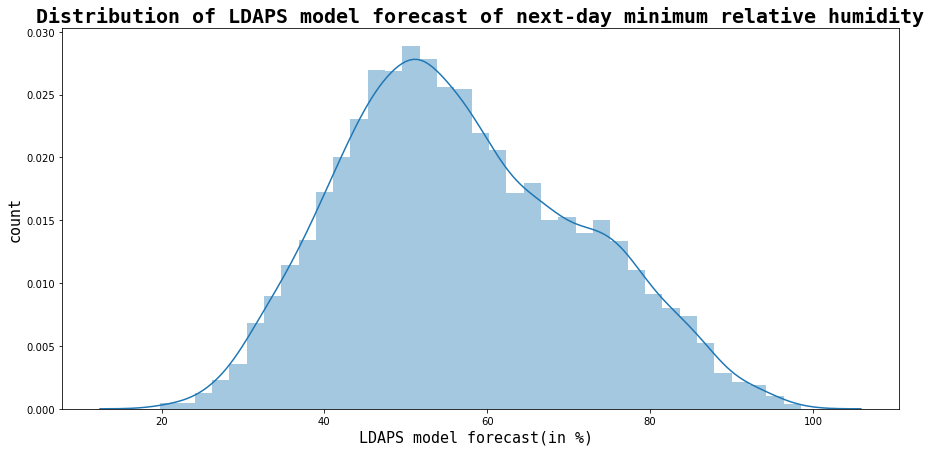

In [13]:
# Creating a Distribution plot for 'LDAPS_RHmin'
ldpas_rhmin=df['LDAPS_RHmin'].value_counts()

plt.figure(figsize=(15, 7))
sns.distplot(df['LDAPS_RHmin'])
plt.title('Distribution of LDAPS model forecast of next-day minimum relative humidity', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('LDAPS model forecast(in %) ', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('count', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.show()

here we can see that the LDAPS model forecast of next-day minimum relative humidity in(% is between 19.8 to 98.5 and also maximum in between 40 to 60 % humidity

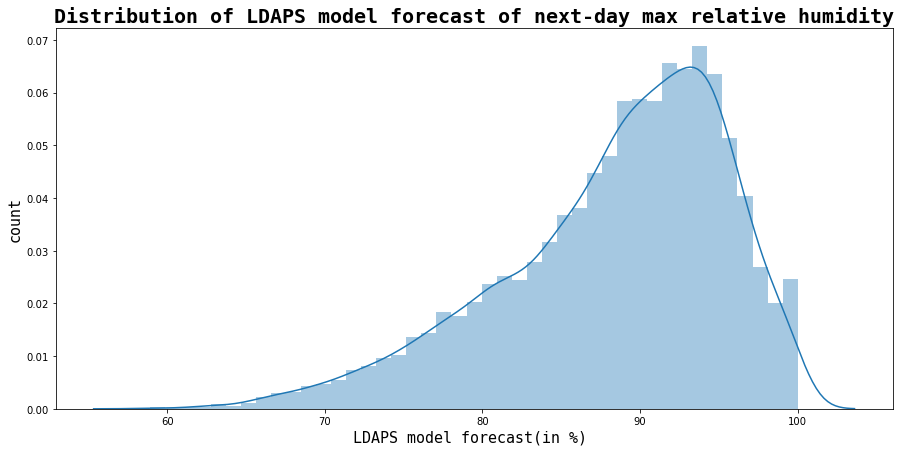

In [14]:
# Creating a Distribution plot for 'LDAPS_RHmax'
ldpas_rhmax=df['LDAPS_RHmax'].value_counts()

plt.figure(figsize=(15, 7))
sns.distplot(df['LDAPS_RHmax'])
plt.title('Distribution of LDAPS model forecast of next-day max relative humidity', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('LDAPS model forecast(in %) ', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('count', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.show()

here we can see that the LDAPS model forecast of next-day maximum relative humidity in(% is between 58.9 to 100 and also maximum in between 83 to 95 % humidity and data is some left skewed.

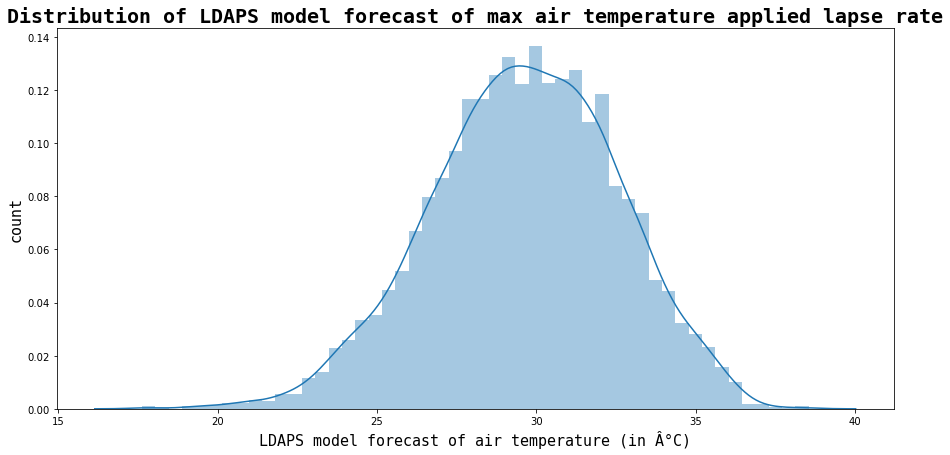

In [15]:
# Creating a Distribution plot for 'LDAPS_Tmax_lapse '
ldaps_tm_lap=df['LDAPS_Tmax_lapse'].value_counts()

plt.figure(figsize=(15, 7))
sns.distplot(df['LDAPS_Tmax_lapse'])
plt.title('Distribution of LDAPS model forecast of max air temperature applied lapse rate', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('LDAPS model forecast of air temperature (in Â°C)', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('count', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.show()

Here , LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C) is between 17.6 to 38.5 (Â°C)

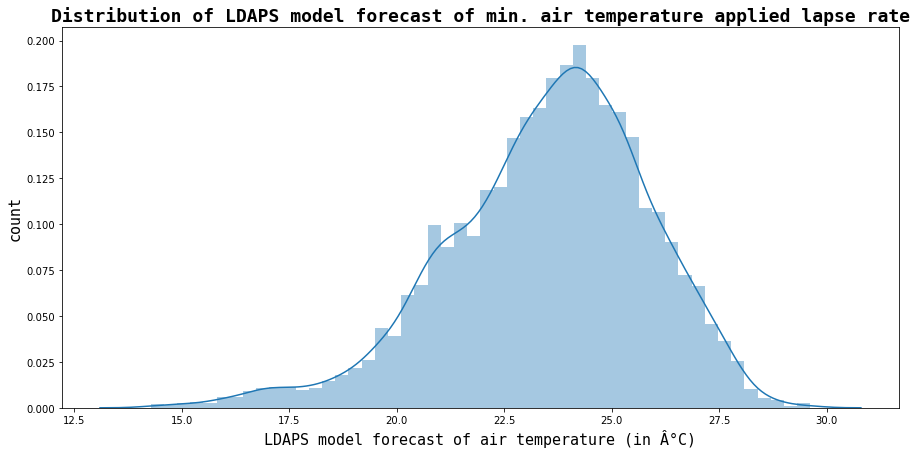

In [16]:
# Creating a Distribution plot for 'LDAPS_Tmin_lapse '
l_lap=df['LDAPS_Tmin_lapse'].value_counts()

plt.figure(figsize=(15, 7))
sns.distplot(df['LDAPS_Tmin_lapse'])
plt.title('Distribution of LDAPS model forecast of min. air temperature applied lapse rate', fontdict={
          'fontname': 'Monospace', 'fontsize': 18, 'fontweight': 'bold'})
plt.xlabel('LDAPS model forecast of air temperature (in Â°C)', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('count', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.show()

Here , LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C) is between 14.3 to 29.6 (Â°C) and data is left skewed with higher values occurance more.

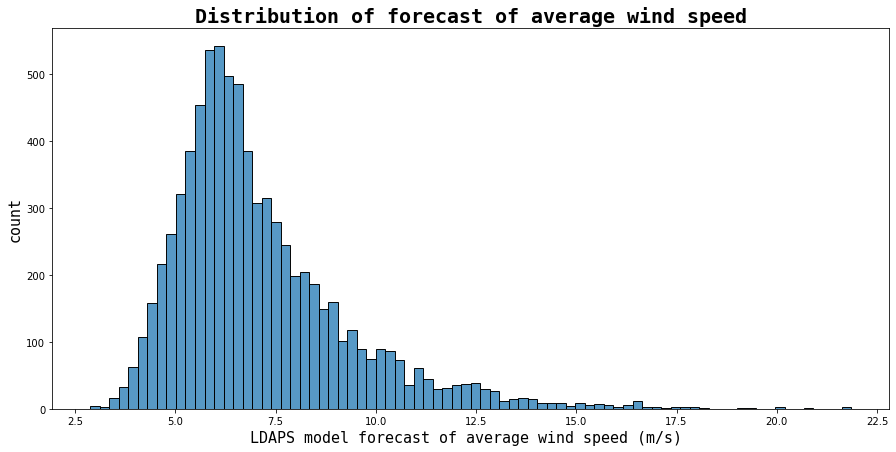

In [17]:
# Creating a histogram plot for 'LDAPS_WS ''

plt.figure(figsize=(15, 7))
sns.histplot(df['LDAPS_WS'])
plt.title('Distribution of forecast of average wind speed', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('LDAPS model forecast of average wind speed (m/s) ', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('count', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.show()

Here we can see that the  LDAPS model forecast of next-day average wind speed is betweeb 2.9 to 21.9 (m/s) and data is positively right skewed with lower values occurance more.

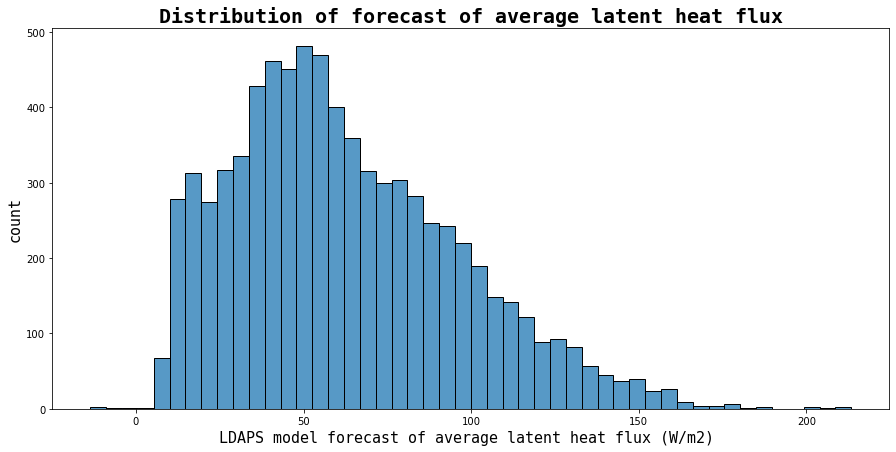

In [18]:
# Creating a histogram plot for 'LDAPS_LH ''

plt.figure(figsize=(15, 7))
sns.histplot(df['LDAPS_LH'])
plt.title('Distribution of forecast of average latent heat flux', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('LDAPS model forecast of average latent heat flux (W/m2) ', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('count', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.show()

we observe that the LDAPS model forecast of next-day average latent heat flux is in between -13.6 to 213.4 (W/m2)

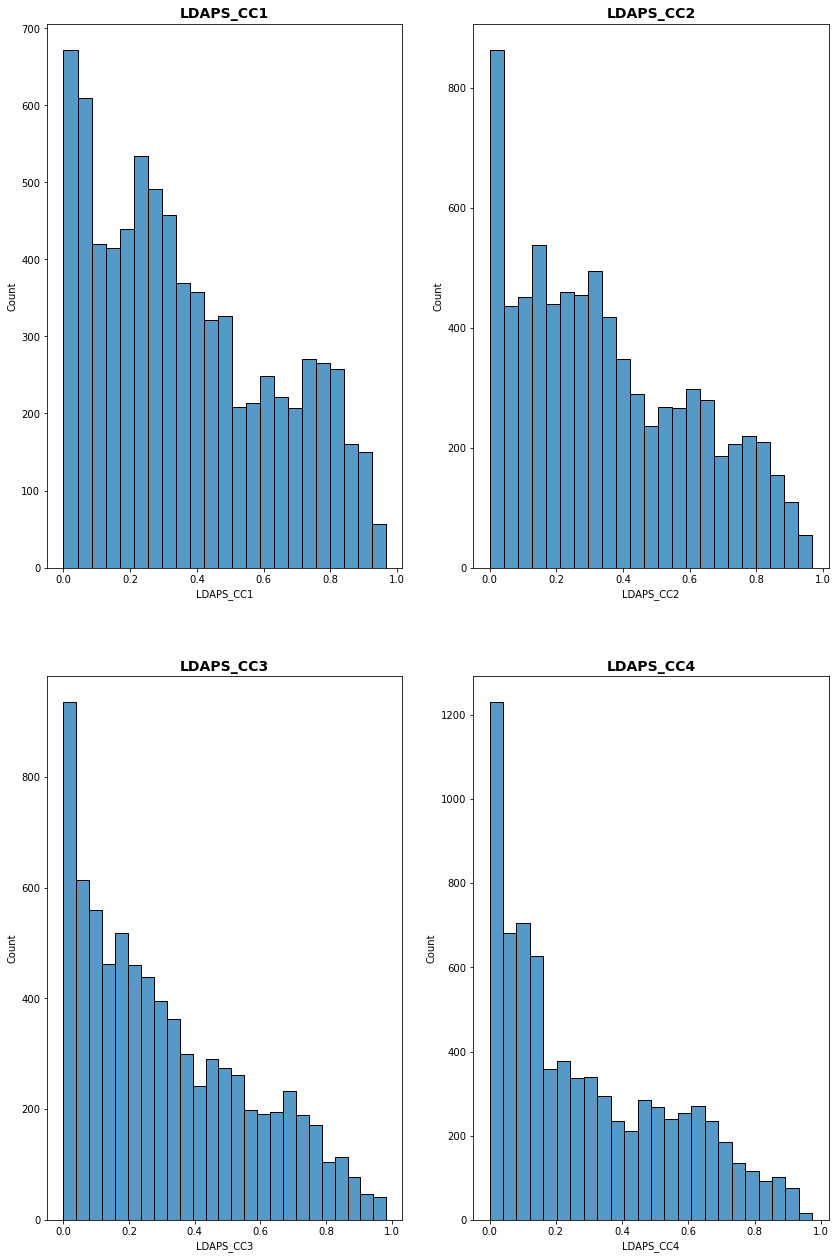

In [19]:
col=['LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4']
a = 2  # number of rows
b = 2 # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(14,22))

for i in col:
    plt.subplot(a, b, c)
    plt.title('{}'.format(i),fontsize=14,fontweight='bold')
    plt.xlabel(i)
    sns.histplot(df[i])
    c = c + 1

plt.show()

From above graphs we observe the LDAPS model forecast of next-day split average cloud cover for next 24 hours and each column is sepearted by 6hrs each and here we can see that the average cloud cover value is in between 0 to 0.97(%)

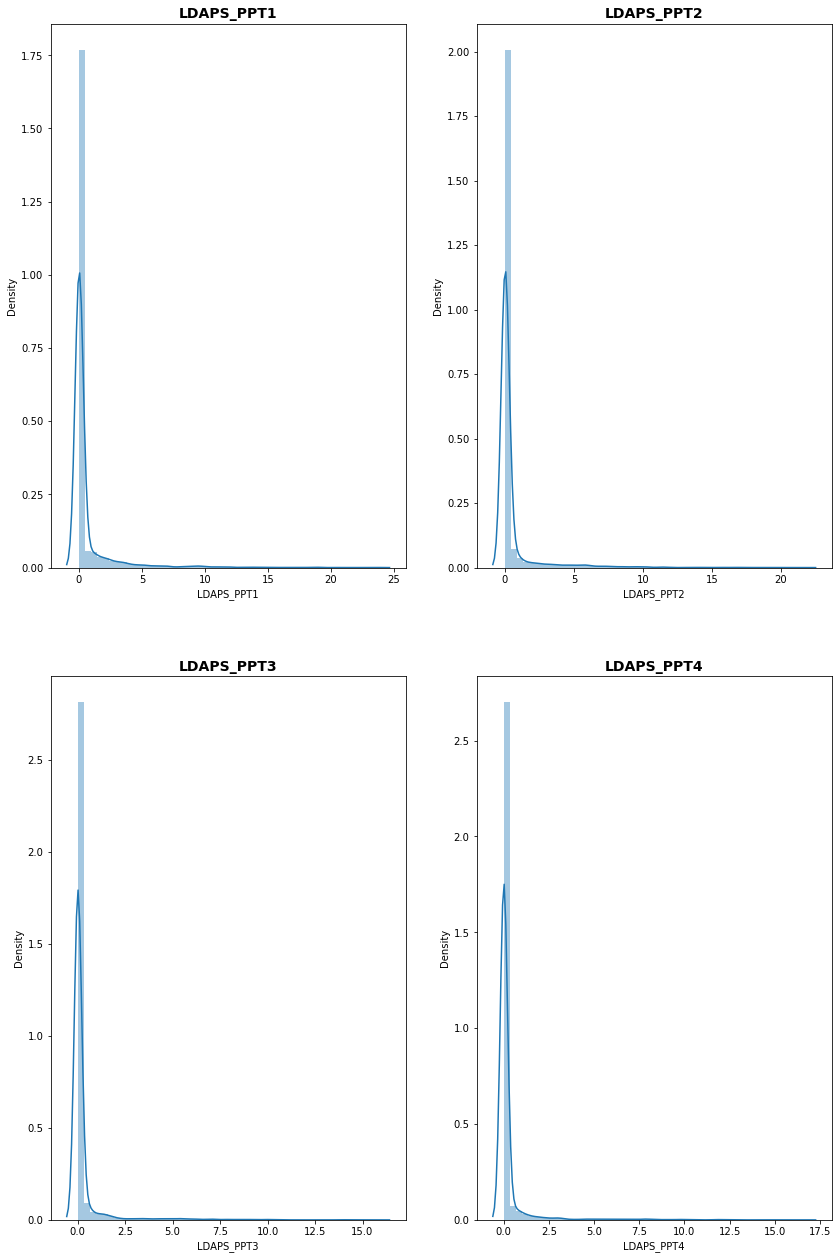

In [20]:
col=['LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4']
a = 2  # number of rows
b = 2 # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(14,22))

for i in col:
    plt.subplot(a, b, c)
    plt.title('{}'.format(i),fontsize=14,fontweight='bold')
    plt.xlabel(i)
    sns.distplot(df[i])
    c = c + 1

plt.show()

From above graphs we observe the LDAPS model forecast of next-day 24-hour split average precipitation which are divided into 6-6 hours and each model forecast the average precipitation value from 0 to 23.7,21.6,15.8,16.7(%) respectively.

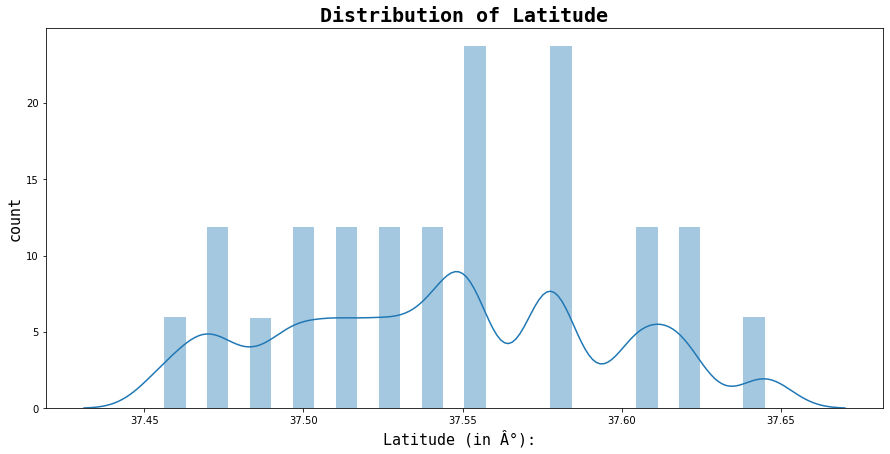

In [21]:
# Creating a Distribution plot for 'latitude'

plt.figure(figsize=(15, 7))
sns.distplot(df['lat'])
plt.title('Distribution of Latitude', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Latitude (in Â°): ', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('count', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.show()

Here we can see the distribution of latitude which is from 37.456 to 36.645(in Â°) and data is highly skewed.

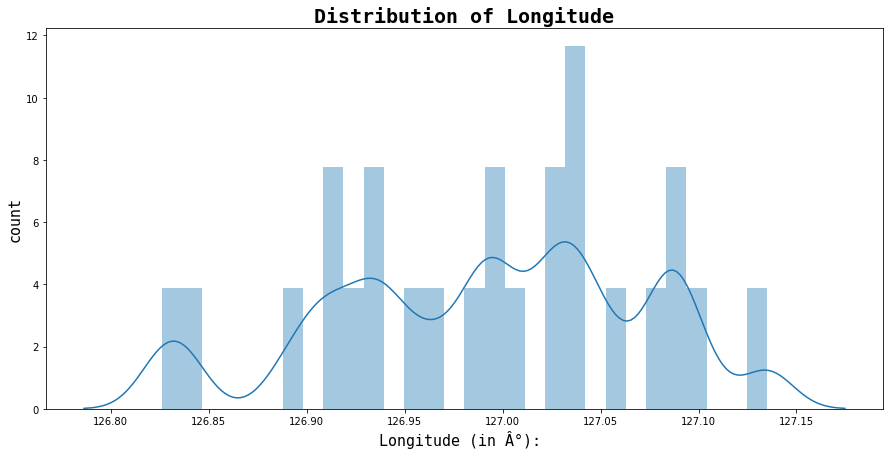

In [22]:
# Creating a histogram plot for 'Longitude'

plt.figure(figsize=(15, 7))
sns.distplot(df['lon'])
plt.title('Distribution of Longitude', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Longitude (in Â°): ', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('count', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.show()

Here we can see the distribution of Longitude which is from 126.826 to 127.135(in Â°)

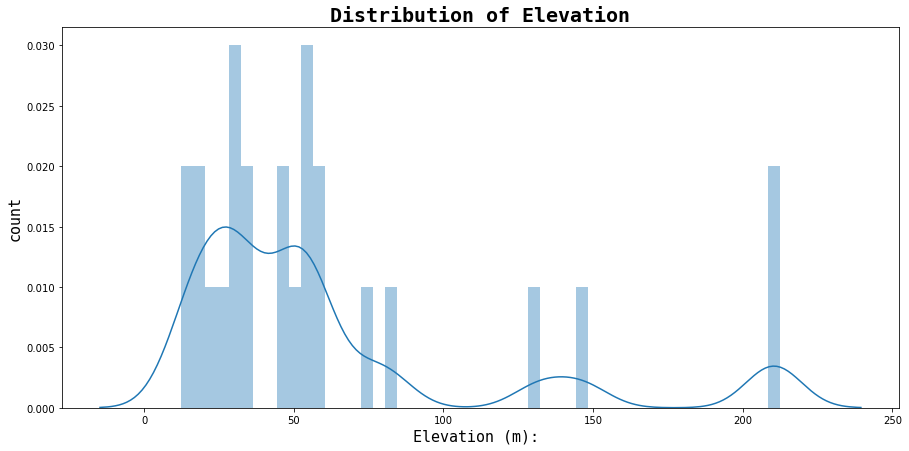

In [23]:
# Creating a Distribution plot for 'Elevation'

plt.figure(figsize=(15, 7))
sns.distplot(df['DEM'])
plt.title('Distribution of Elevation', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Elevation (m): ', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('count', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.show()

Here we can see the distribution of Elevation which is from 12.4 to 212.3 (in m).

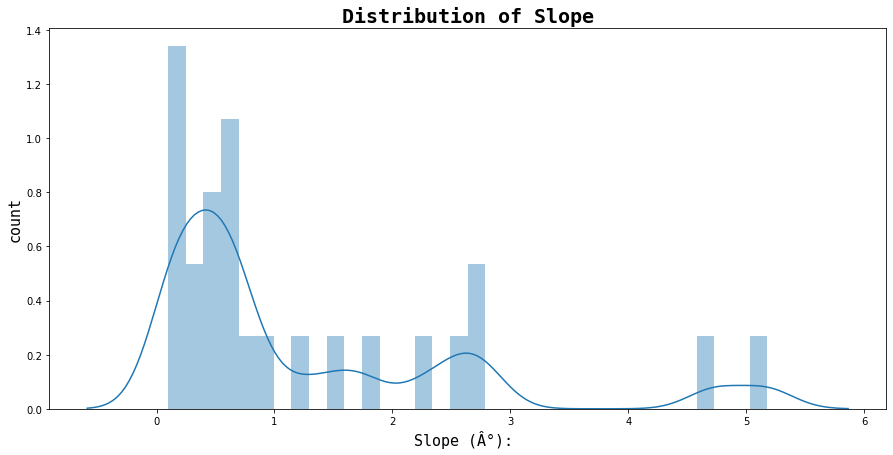

In [24]:
# Creating a Distribution plot for 'Slope'

plt.figure(figsize=(15, 7))
sns.distplot(df['Slope'])
plt.title('Distribution of Slope', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Slope (Â°): ', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('count', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.show()

Here we can see the distribution of Slope which is from 0.1 to 5.2 (in Â°)

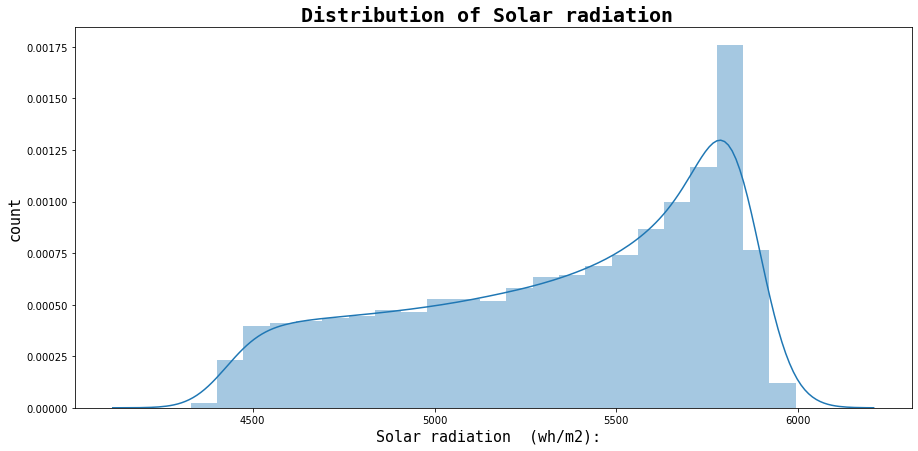

In [25]:
# Creating a Distribution plot for 'Solar radiation '

plt.figure(figsize=(15, 7))
sns.distplot(df['Solar radiation'])
plt.title('Distribution of Solar radiation ', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Solar radiation  (wh/m2): ', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('count', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.show()

Here we can see that the distribution of Daily incoming of solar radiation is in between 4329/5 to 5992.9 (wh/m2) and the data is skewed.

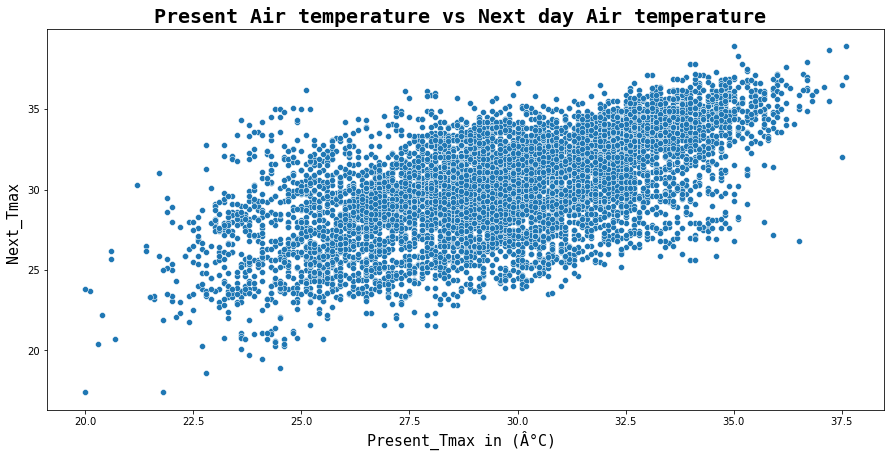

In [26]:
# Creating a Relation between 'Present_Tmax ' and 'Next_Tmax'

plt.figure(figsize=(15, 7))
sns.scatterplot(x='Present_Tmax',y='Next_Tmax',data=df)
plt.title('Present Air temperature vs Next day Air temperature ', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Present_Tmax in (Â°C) ', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Next_Tmax ', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.show()

Here we can see that As maximum air temperature between 0 and 21 h on the present day increases , the next-day maximum air temperature also increases.

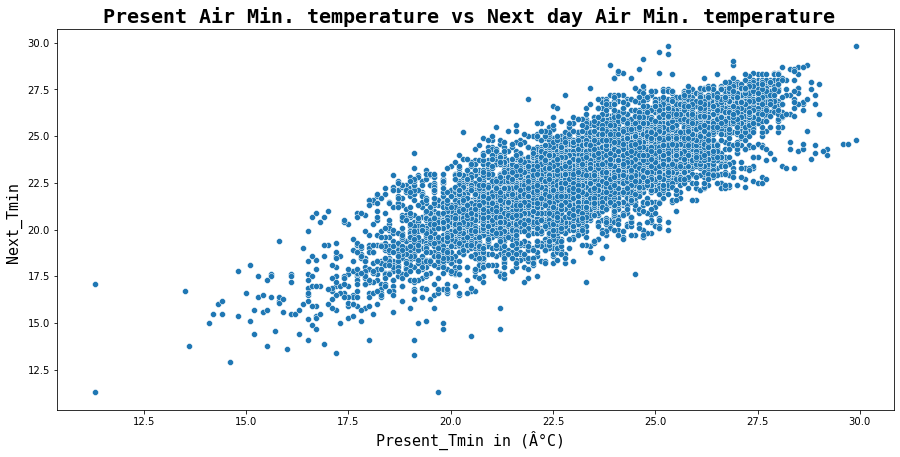

In [27]:
# Creating a Relation  between 'Present_Tmin ' and 'Next_Tmin'

plt.figure(figsize=(15, 7))
sns.scatterplot(x='Present_Tmin',y='Next_Tmin',data=df)
plt.title('Present Air Min. temperature vs Next day Air Min. temperature ', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Present_Tmin in (Â°C) ', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Next_Tmin ', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.show()

Here we can see that As Minimum air temperature between 0 and 21 h on the present day , the next-day minimum air temperature also increases.

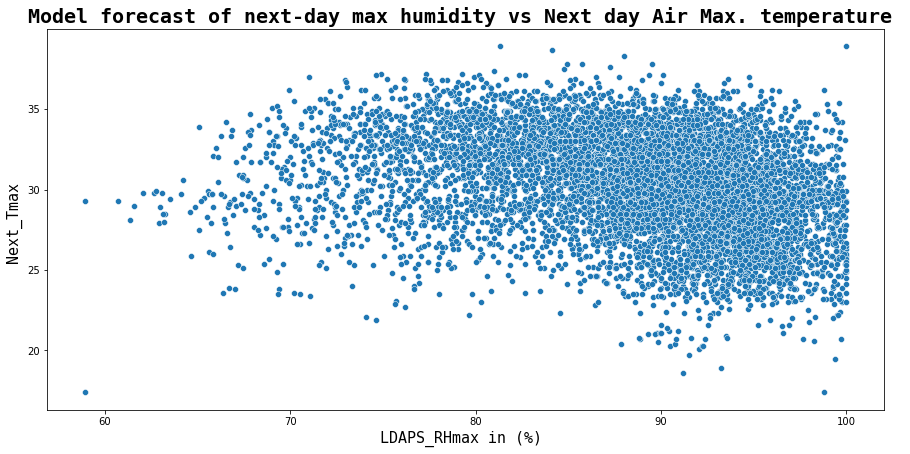

In [28]:
# Creating a Relation  between 'LDAPS_RHmax ' and 'Next_Tmax'

plt.figure(figsize=(15, 7))
sns.scatterplot(x='LDAPS_RHmax',y='Next_Tmax',data=df)
plt.title('Model forecast of next-day max humidity vs Next day Air Max. temperature ', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('LDAPS_RHmax in (%) ', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Next_Tmax ', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.show()

When LDAPS model forecast of next-day maximum relative humidity is high, the Air temperature of next day is also higher

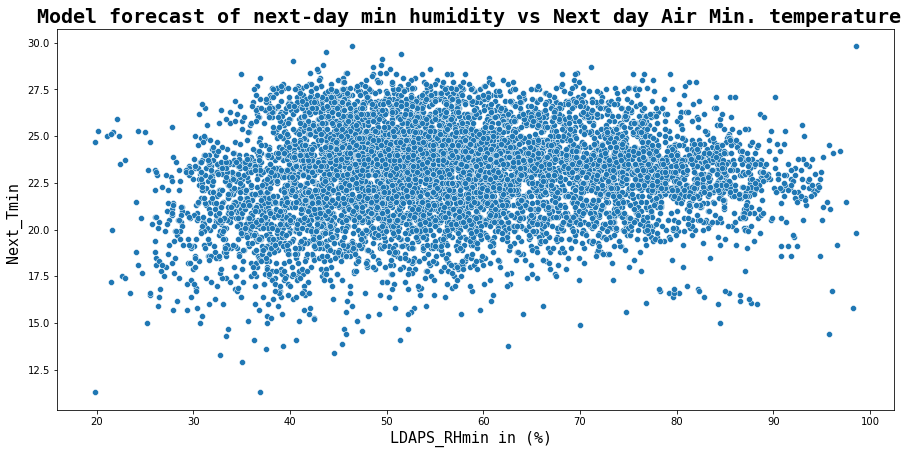

In [29]:
# Creating a Relation  between 'LDAPS_RHmin ' and 'Next_Tmin'

plt.figure(figsize=(15, 7))
sns.scatterplot(x='LDAPS_RHmin',y='Next_Tmin',data=df)
plt.title('Model forecast of next-day min humidity vs Next day Air Min. temperature ', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('LDAPS_RHmin in (%) ', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Next_Tmin ', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.show()

When LDAPS model forecast of next-day minimum relative humidity is high, the minimum Air temperature of next day is also higher

<AxesSubplot:xlabel='Slope', ylabel='Next_Tmax'>

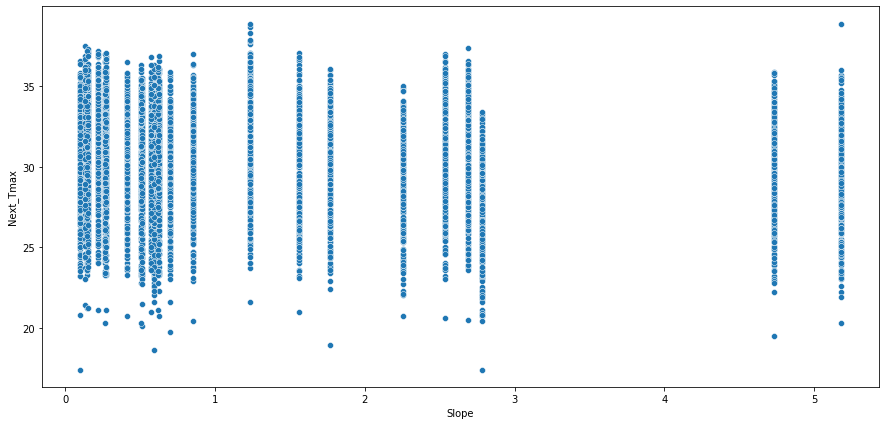

In [30]:
plt.figure(figsize=(15, 7))
sns.scatterplot(x='Slope',y='Next_Tmax',data=df)

As here we can see that the max slope is in between 0 to 1 (Â°)

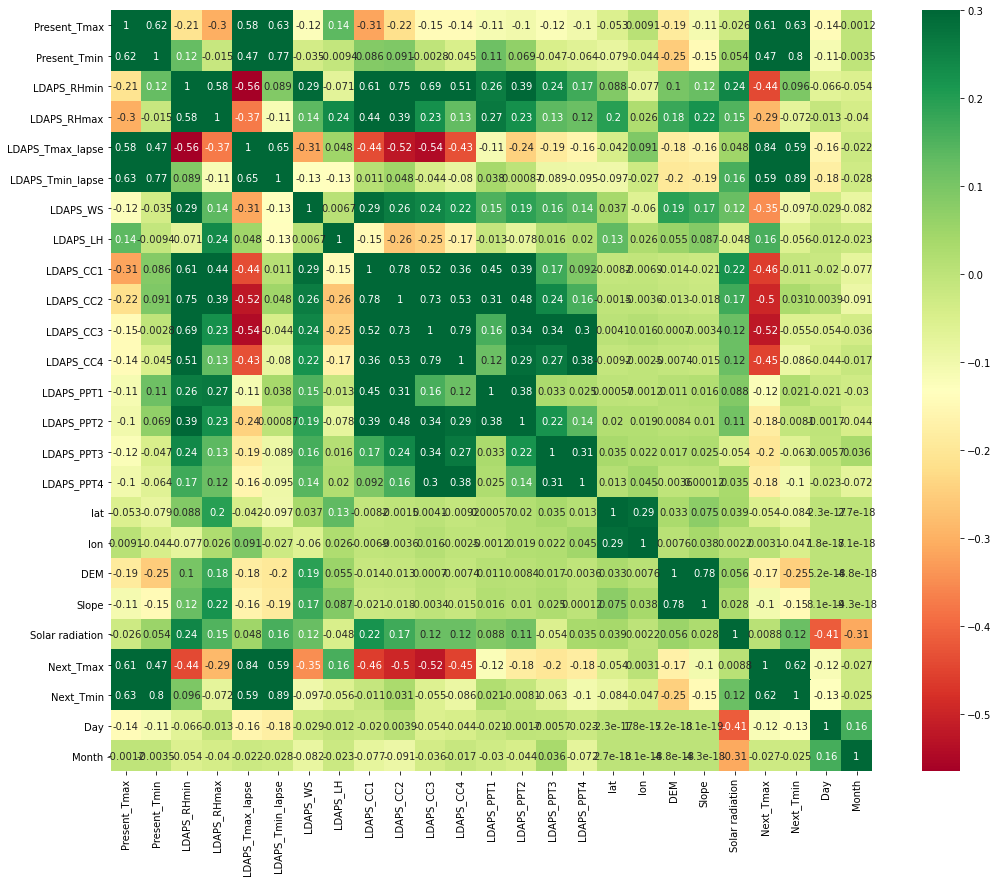

In [31]:
plt.figure(figsize=(18, 14))
corr = df.corr()
sns.heatmap(corr, vmax=.3, square=True,annot=True, cmap='RdYlGn')
plt.show()

Here we can see that our target column is Next_Tmax is highly negatively correlated with the LDAPS_RHmin, LDAPS_WS,LDPAS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC3 and positive correlated with the Present_Tmax and LDAPS_Tmax_lapse

### Data Preprocessing:

In [32]:
df.isnull().sum()

Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
Day                  2
Month                2
dtype: int64

here we see that there are some null values are present lets fill this value with the mean of the column.

In [33]:
df.columns

Index(['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin', 'Day', 'Month'],
      dtype='object')

In [34]:
#Filling the missing values
df['Present_Tmax'].fillna(df['Present_Tmax'].mean(),inplace=True)
df['Present_Tmin'].fillna(df['Present_Tmin'].mean(),inplace=True)
df['LDAPS_RHmin'].fillna(df['LDAPS_RHmin'].mean(),inplace=True)
df['LDAPS_RHmax'].fillna(df['LDAPS_RHmax'].mean(),inplace=True)
df['LDAPS_Tmax_lapse'].fillna(df['LDAPS_Tmax_lapse'].mean(),inplace=True)
df['LDAPS_Tmin_lapse'].fillna(df['LDAPS_Tmin_lapse'].mean(),inplace=True)
df['LDAPS_WS'].fillna(df['LDAPS_WS'].mean(),inplace=True)
df['LDAPS_LH'].fillna(df['LDAPS_LH'].mean(),inplace=True)
df['LDAPS_CC1'].fillna(df['LDAPS_CC1'].mean(),inplace=True)
df['LDAPS_CC2'].fillna(df['LDAPS_CC2'].mean(),inplace=True)
df['LDAPS_CC3'].fillna(df['LDAPS_CC3'].mean(),inplace=True)
df['LDAPS_CC4'].fillna(df['LDAPS_CC4'].mean(),inplace=True)
df['LDAPS_PPT1'].fillna(df['LDAPS_PPT1'].mean(),inplace=True)
df['LDAPS_PPT2'].fillna(df['LDAPS_PPT2'].mean(),inplace=True)
df['LDAPS_PPT3'].fillna(df['LDAPS_PPT3'].mean(),inplace=True)
df['LDAPS_PPT4'].fillna(df['LDAPS_PPT4'].mean(),inplace=True)
df['Next_Tmax'].fillna(df['Next_Tmax'].mean(),inplace=True)
df['Next_Tmin'].fillna(df['Next_Tmin'].mean(),inplace=True)
df['Day'].fillna(df['Day'].mean(),inplace=True)
df['Month'].fillna(df['Month'].mean(),inplace=True)


In [35]:
df.skew()

Present_Tmax       -0.264137
Present_Tmin       -0.367538
LDAPS_RHmin         0.300220
LDAPS_RHmax        -0.855015
LDAPS_Tmax_lapse   -0.227880
LDAPS_Tmin_lapse   -0.581763
LDAPS_WS            1.579236
LDAPS_LH            0.673757
LDAPS_CC1           0.459458
LDAPS_CC2           0.472350
LDAPS_CC3           0.640735
LDAPS_CC4           0.666482
LDAPS_PPT1          5.393821
LDAPS_PPT2          5.775355
LDAPS_PPT3          6.457129
LDAPS_PPT4          6.825464
lat                 0.087062
lon                -0.285213
DEM                 1.723257
Slope               1.563020
Solar radiation    -0.511210
Next_Tmax          -0.340200
Next_Tmin          -0.404447
Day                 0.245514
Month              -0.705332
dtype: float64

In [36]:
#making the skew less than or equal to 0.55 for better prediction and plotting Normal distribution

skew=[ 'LDAPS_RHmax', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'DEM', 'Slope',
       'Solar radiation']

for col in skew:
    if df.skew().loc[col]>=0.55:
        df[col]=np.cbrt(df[col])
    if df.skew().loc[col]<=-0.55:
        df[col]=np.cbrt(df[col])

In [37]:
df.skew()

Present_Tmax       -0.264137
Present_Tmin       -0.367538
LDAPS_RHmin         0.300220
LDAPS_RHmax        -1.003054
LDAPS_Tmax_lapse   -0.227880
LDAPS_Tmin_lapse   -0.826395
LDAPS_WS            0.884657
LDAPS_LH           -0.414152
LDAPS_CC1           0.459458
LDAPS_CC2           0.472350
LDAPS_CC3          -2.575911
LDAPS_CC4          -0.466712
LDAPS_PPT1          1.922841
LDAPS_PPT2          2.223126
LDAPS_PPT3          2.523911
LDAPS_PPT4          2.792122
lat                 0.087062
lon                -0.285213
DEM                 0.919779
Slope               0.614110
Solar radiation    -0.511210
Next_Tmax          -0.340200
Next_Tmin          -0.404447
Day                 0.245514
Month              -0.705332
dtype: float64

### Feature Selection:

In [38]:
df.isnull().sum()

Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
Day                 0
Month               0
dtype: int64

In [39]:
#Lets divide the dataset into input and output
X = df.drop(['Next_Tmax',"Next_Tmin"], axis=1)
Y = df[['Next_Tmax','Next_Tmin']]

In [40]:
from sklearn.preprocessing import StandardScaler

for col in X.columns:
    scaler = StandardScaler()
    X[col] = scaler.fit_transform(X[col].values.reshape(-1, 1))
    
x=pd.DataFrame(X,columns=X.columns)
x.head()

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Day,Month
0,-0.361326,-0.759529,0.102515,0.396191,-0.524889,-0.178563,-0.044938,0.372917,-0.516243,-0.592636,...,-0.519688,-0.494338,-0.439945,1.189286,-0.005000,2.327694,1.271571,1.517935,1.654062,-0.482877
1,0.721084,-0.676296,-0.308027,0.327952,0.080895,0.249825,-0.659198,-0.129558,-0.548557,-0.406199,...,-0.519688,-0.494338,-0.439945,1.189286,0.511177,-0.148505,-0.423351,1.229950,1.654062,-0.482877
2,0.619608,0.031188,-0.552814,-0.580663,0.162936,0.466164,-0.406997,-1.441627,-0.610450,-0.384009,...,-0.519688,-0.494338,-0.439945,0.653021,0.838510,-0.490091,-0.865063,1.216534,1.654062,-0.482877
3,0.754909,0.072805,0.101426,1.097115,0.031092,-0.044195,-0.683506,0.273828,-0.583539,-0.506548,...,-0.519688,-0.494338,-0.439945,1.991696,0.385280,-0.122836,1.149984,1.201176,1.654062,-0.482877
4,0.551957,-0.551446,-0.040098,0.267776,-0.170325,0.022813,-0.634273,1.235167,-0.832287,-0.413115,...,-0.519688,-0.494338,-0.439945,0.118743,1.807917,-0.433902,-0.435918,1.207205,1.654062,-0.482877


In [41]:
X.shape

(7752, 23)

In [42]:
Y=pd.DataFrame(Y)

In [43]:
Y

,Next_Tmax,Next_Tmin
0,29.1,21.2
1,30.5,22.5
2,31.1,23.9
3,31.7,24.3
4,31.2,22.5
...,...,...
7747,28.3,18.1
7748,28.6,18.8
7749,27.8,17.4
7750,17.4,11.3


###  Model Training:


In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

In [45]:
x_train, x_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=42)

In [46]:
print("X_train shape:", x_train.shape)
print("X_test shape:", x_test.shape)
print("Y_train shape:", y_train.shape)
print("Y_test shape:", y_test.shape)

X_train shape: (6201, 23)
X_test shape: (1551, 23)
Y_train shape: (6201, 2)
Y_test shape: (1551, 2)


### Apply Linear Regression

In [47]:
lr=LinearRegression()

In [48]:
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
r2_sc= r2_score(y_test,pred)
print("R2 score :",r2_sc*100)

R2 score : 80.00955376498214


### Decision Tree Regressor

In [49]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_dtr=dtr.predict(x_test)
r2_sc= r2_score(y_test,pred_dtr)
print("R2 score of decision Tree regressor :",r2_sc*100)


R2 score of decision Tree regressor : 77.23874130211672


### Random Forest Regressor

In [50]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
pred_rfr=rfr.predict(x_test)
r2_sc= r2_score(y_test,pred_rfr)
print("R2 score of Random Forest regressor :",r2_sc*100)

R2 score of Random Forest regressor : 90.54506033779941


### MultiOutput Regressor sklearn

In [51]:
from sklearn.svm import LinearSVR
svregressor=LinearSVR()


In [52]:
mulregressor=MultiOutputRegressor(svregressor)
mulregressor.fit(x_train,y_train)
pred_mr=mulregressor.predict(x_test)
r2_sc= r2_score(y_test,pred_mr)
print("R2 score of Multi Output regressor :",r2_sc*100)

R2 score of Multi Output regressor : 79.80665574581913


### KNeighborsRegressor

In [53]:
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
r2_sc= r2_score(y_test,pred_knn)
print("R2 score of KNeighbors regressor :",r2_sc*100)

R2 score of KNeighbors regressor : 88.91021246907317


### AdaBoost Regressor

In [54]:
ada=AdaBoostRegressor()
mulregressor=MultiOutputRegressor(ada)
mulregressor.fit(x_train,y_train)
pred_ada=mulregressor.predict(x_test)
r2_sc= r2_score(y_test,pred_ada)
print("R2 score of Multi Output regressor of Ada Boost :",r2_sc*100)

R2 score of Multi Output regressor of Ada Boost : 77.79333836591448



Max R2_score is 90.62303237434118 and the model is RandomForestRegressor()


In [55]:
clf=RandomForestRegressor(random_state=98,criterion='mse')
clf.fit(x_train,y_train)
y_pred=clf.predict(x_train)
print('RMSE loss in train :',np.sqrt(mean_squared_error(y_train,y_pred)))

RMSE loss in train : 0.3394354767418936


### Hyperparameter Tuning

In [56]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
model = RandomForestRegressor()
rand_search = RandomizedSearchCV(estimator=model, param_distributions=random_grid,n_jobs=-1)

rand_search.fit(x_train, y_train)

print(rand_search.best_estimator_)
print(rand_search.best_score_)

RandomForestRegressor(bootstrap=False, max_depth=20, max_features='sqrt',
                      min_samples_split=5, n_estimators=1800)
0.9098389605345696


### Model Evaluation with best parameters :

In [58]:
Rfr = RandomForestRegressor( bootstrap=False, max_depth=20, max_features='sqrt',
                      min_samples_split=5, n_estimators=1800)
Rfr.fit(x_train,y_train)
pred=Rfr.predict(x_test)
r2_sc= r2_score(y_test,pred)
print("R2 score :",r2_sc*100)

R2 score : 92.61353683861947


Our final model gives a R2 score of 92.61 which is ver good.

In [59]:
#Metrices Evaluation:
print("Mean Absolute Error: ",mean_absolute_error(y_test,pred))
print("Mean Squared Error: ",mean_squared_error(y_test,pred))
print('RMSE loss in train :',np.sqrt(mean_squared_error(y_test,pred)))

Mean Absolute Error:  0.5789853736718651
Mean Squared Error:  0.588967829626452
RMSE loss in train : 0.7674423949889998


In [61]:
score=cross_val_score(Rfr,X,Y,cv=5)
print("The score after cross_validation : ",score)
print("The Mean score after cross_validation : ",score.mean())

The score after cross_validation :  [0.67343114 0.62130743 0.70776185 0.80424766 0.74644083]
The Mean score after cross_validation :  0.7106377812988134


In [62]:
#Applying model on the test set
y_prediction=Rfr.predict(x_test)

In [63]:
#lets make the dataframe for price_pred
temp_pred=pd.DataFrame(y_prediction,columns=["Next_Tmax","Next_Tmin"])

In [64]:
temp_pred.head()

,Next_Tmax,Next_Tmin
0,28.495987,20.451284
1,34.734766,27.004590
2,25.332600,21.215583
3,34.450399,24.926354
4,32.576345,25.986208


In [66]:
#Lets save the submission to csv
temp_pred.to_csv("Temperature_Predictions.csv",index=False)

### Saving the model

In [67]:
#saving the model
model=joblib.dump(Rfr,'Temperature_RFR.obj')

## Conclusion :

- While using the best state 42 which providing the highest R2 score value for this model.


- Here we have multi output target variable i.e we have 2 target columns


- These type of problem is called MultiOutput Regressor problem.


- All Algorithms does not support Multioutput Regressor. Therefore we use MultiOutputRegressor from the scikit learn library


- With the help of this we use those models(LinearSVR and Adaboost) which we can not use directly in the MultioutputRegressor 


- After using the RandomizedSearchCV, I can find the best param and then I used these param for that model.


- After using the best param I can get the best R2 score of 92.61 and the model is RandomForestRegressor.